In [1]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.model_selection import train_test_split 
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = 'criminal_train.csv'
train_df = read_csv(train)

test = 'criminal_test.csv'
test_df = read_csv(test)

In [3]:
combine = [train_df,test_df]

In [4]:
train_df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
test_df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [6]:
train_df.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1252.396472,40013.000000,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2719.335160,40025.000000,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5765.810794,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


In [7]:
print(train_df.dtypes)

PERID          int64
IFATHER        int64
NRCH17_2       int64
IRHHSIZ2       int64
IIHHSIZ2       int64
IRKI17_2       int64
IIKI17_2       int64
IRHH65_2       int64
IIHH65_2       int64
PRXRETRY       int64
PRXYDATA       int64
MEDICARE       int64
CAIDCHIP       int64
CHAMPUS        int64
PRVHLTIN       int64
GRPHLTIN       int64
HLTINNOS       int64
HLCNOTYR       int64
HLCNOTMO       int64
HLCLAST        int64
HLLOSRSN       int64
HLNVCOST       int64
HLNVOFFR       int64
HLNVREF        int64
HLNVNEED       int64
HLNVSOR        int64
IRMCDCHP       int64
IIMCDCHP       int64
IRMEDICR       int64
IIMEDICR       int64
              ...   
CELLNOTCL      int64
CELLWRKNG      int64
IRFAMSOC       int64
IIFAMSOC       int64
IRFAMSSI       int64
IIFAMSSI       int64
IRFSTAMP       int64
IIFSTAMP       int64
IRFAMPMT       int64
IIFAMPMT       int64
IRFAMSVC       int64
IIFAMSVC       int64
IRWELMOS       int64
IIWELMOS       int64
IRPINC3        int64
IRFAMIN3       int64
IIPINC3      

In [8]:

feature_labels = [] 
missing_values = []

for col in train_df.columns: 
    feature_labels.append(col)
    missing_values.append(train_df[col].isnull().values.ravel().sum()) 
    print(col,"=", missing_values[-1])



PERID = 0
IFATHER = 0
NRCH17_2 = 0
IRHHSIZ2 = 0
IIHHSIZ2 = 0
IRKI17_2 = 0
IIKI17_2 = 0
IRHH65_2 = 0
IIHH65_2 = 0
PRXRETRY = 0
PRXYDATA = 0
MEDICARE = 0
CAIDCHIP = 0
CHAMPUS = 0
PRVHLTIN = 0
GRPHLTIN = 0
HLTINNOS = 0
HLCNOTYR = 0
HLCNOTMO = 0
HLCLAST = 0
HLLOSRSN = 0
HLNVCOST = 0
HLNVOFFR = 0
HLNVREF = 0
HLNVNEED = 0
HLNVSOR = 0
IRMCDCHP = 0
IIMCDCHP = 0
IRMEDICR = 0
IIMEDICR = 0
IRCHMPUS = 0
IICHMPUS = 0
IRPRVHLT = 0
IIPRVHLT = 0
IROTHHLT = 0
IIOTHHLT = 0
HLCALLFG = 0
HLCALL99 = 0
ANYHLTI2 = 0
IRINSUR4 = 0
IIINSUR4 = 0
OTHINS = 0
CELLNOTCL = 0
CELLWRKNG = 0
IRFAMSOC = 0
IIFAMSOC = 0
IRFAMSSI = 0
IIFAMSSI = 0
IRFSTAMP = 0
IIFSTAMP = 0
IRFAMPMT = 0
IIFAMPMT = 0
IRFAMSVC = 0
IIFAMSVC = 0
IRWELMOS = 0
IIWELMOS = 0
IRPINC3 = 0
IRFAMIN3 = 0
IIPINC3 = 0
IIFAMIN3 = 0
GOVTPROG = 0
POVERTY3 = 0
TOOLONG = 0
TROUBUND = 0
PDEN10 = 0
COUTYP2 = 0
MAIIN102 = 0
AIIND102 = 0
ANALWT_C = 0
VESTR = 0
VEREP = 0
Criminal = 0


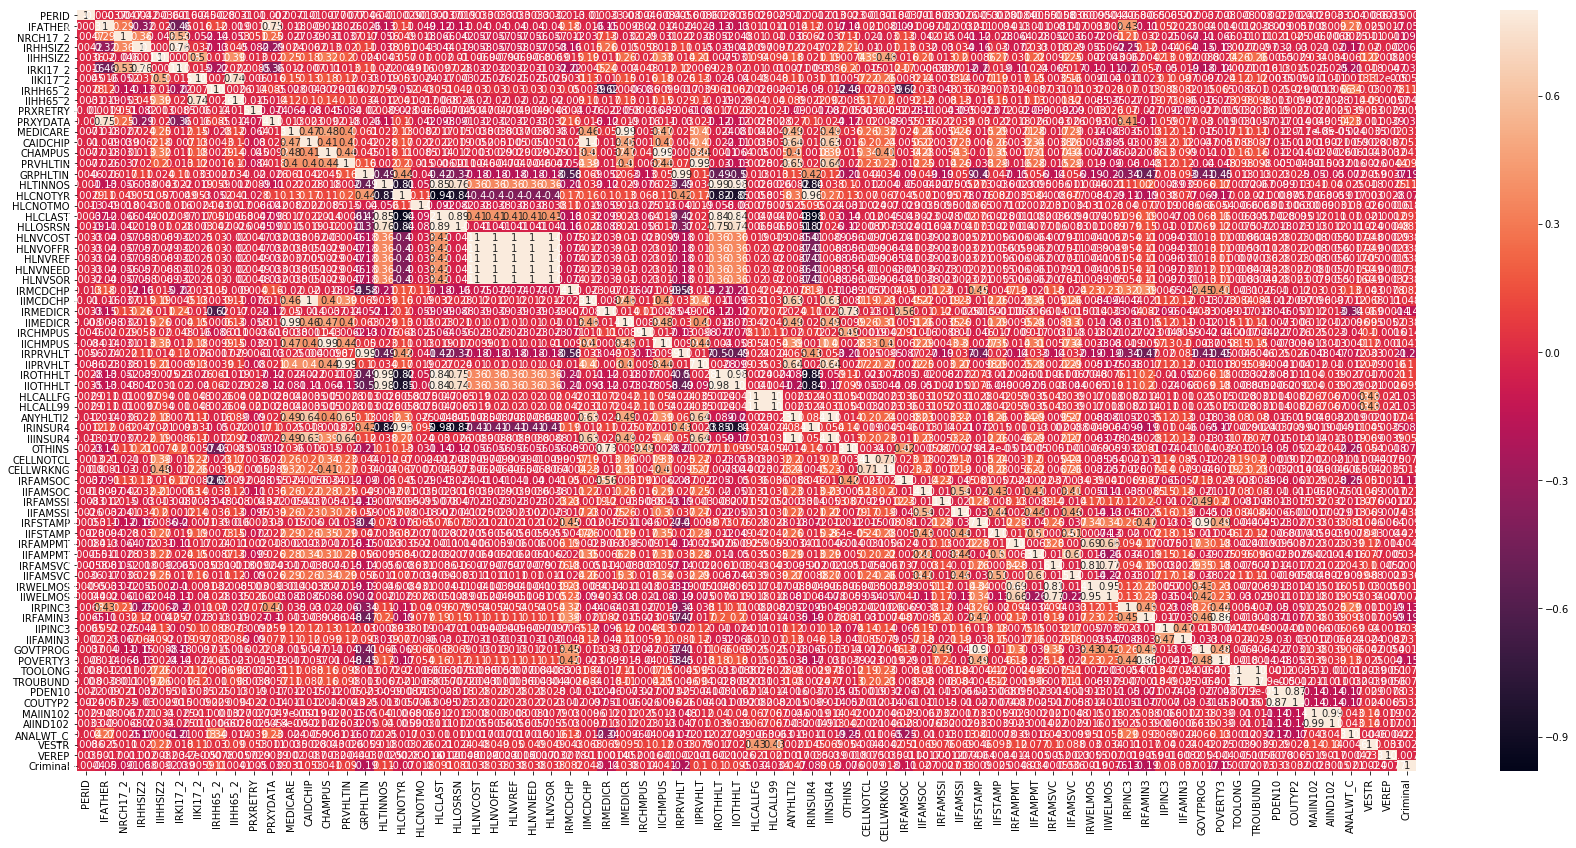

In [9]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(30, 14))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [10]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["Criminal"], ascending = False, inplace = True)
print(corr.Criminal)
#this you can see at the time of heatmap also.

Find most important features relative to target
Criminal    1.000000
IRHH65_2    0.112589
HLTINNOS    0.106967
IROTHHLT    0.104196
IIPRVHLT    0.103360
IIOTHHLT    0.095032
HLCLAST     0.091338
PRVHLTIN    0.089960
IRMCDCHP    0.081704
HLLOSRSN    0.081006
CAIDCHIP    0.052671
IIINSUR4    0.049871
IIMCDCHP    0.048222
ANYHLTI2    0.046698
CHAMPUS     0.040844
IICHMPUS    0.040529
HLNVREF     0.038382
HLNVCOST    0.038380
HLNVSOR     0.038379
HLNVOFFR    0.038379
HLNVNEED    0.038378
IIFAMSSI    0.038064
IIMEDICR    0.037516
IIFAMIN3    0.037193
IIFAMSVC    0.035574
IIFAMPMT    0.034474
PDEN10      0.033048
COUTYP2     0.031587
MEDICARE    0.031178
IIPINC3     0.029628
              ...   
PRXRETRY    0.004966
IRFAMPMT    0.004810
IIHH65_2    0.004112
VESTR       0.002355
MAIIN102    0.002309
IRWELMOS    0.001917
GOVTPROG    0.001719
AIIND102    0.001484
PERID      -0.000396
IRFAMSVC   -0.000553
IRFAMSSI   -0.002666
IIWELMOS   -0.007639
VEREP      -0.007738
HLCALL99   -0.034450
HLCALLF

#Plot Correlation Matrix
attr_basic=['IRHH65_2','HLTINNOS','IROTHHLT','IIPRVHLT','IIOTHHLT','HLCLAST']
data_basic=train_df.loc[:,attr_basic]
plot_corr_matrix(data_basic,attr_basic,3)

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

In [ ]:
train_df = train_df.drop(["IRHH65_2","HLTINNOS","IROTHHLT","IIPRVHLT"], axis=1)

In [ ]:
test_df = test_df.drop(["IRHH65_2","HLTINNOS","IROTHHLT","IIPRVHLT"], axis=1)

In [ ]:
print (type(train_df))

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

In [ ]:
print(train_df.columns.values)

In [ ]:
train_df = train_df.drop("PERID", axis=1)

In [ ]:
X_train = train_df.drop("Criminal", axis=1)
Y_train = train_df["Criminal"]
X_test  = test_df.drop("PERID", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import Series,DataFrame
import random as rnd

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

In [ ]:
svc = SVC() 
svc.fit(X_train, Y_train) 
Y_pred = svc.predict(X_test) 
acc_svc = round(svc.score(X_train, Y_train) * 100, 2) 
acc_svc

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:

import pandas as pd

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "PERID": test_df["PERID"],
        "Criminal": Y_pred
    })

In [ ]:
submission.to_csv('sample_submission10.csv', index=False,  columns = ["PERID","Criminal"])